<a href="https://colab.research.google.com/github/aaronlara/redes_neuronales/blob/master/EDA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ataques cardiacos

###Realizaremos un análisis exploratorio de datos de una tabla con información relativa a ataques del corazón

Empezamos por llamar la librería Tidyverse que, a su vez, contiene otras librerías utiles para el EDA como dplyer y ggplot2

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Se lee el archivo, en el caso de colab hay que subirlo cada vez que se usa

In [ ]:
df <- read_csv( "/content/heart_failure_clinical_records_dataset.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)




Se muestra la cabecera de la tabla

In [ ]:
head(df)

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


Se muestran algunos valores de la tabla

In [ ]:
summary(df)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

Se especifica la definición de los valores 0 y 1 para algunas variables

In [ ]:
df <- df %>%
        mutate(diabetes = as.factor(ifelse(diabetes == 1, "pos", "neg")),
            anemia =  as.factor(ifelse(anaemia == 1, "pos", "neg")), 
            alta_presion = as.factor(ifelse(high_blood_pressure == 1, "pos", "neg")),
            genero = ifelse(sex == 1, "hombre", "mujer"),
            fumador = factor(ifelse(smoking == 1, "pos", "neg")),
            muertes = factor(ifelse(DEATH_EVENT == 1, "fallecido", "censado")))

In [ ]:
install.packages("skimr")
library(skimr)
skim(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             299   
Number of columns          18    
_______________________          
Column type frequency:           
  character                1     
  factor                   5     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 genero                0             1     5     6     0        2          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 diabetes              0             1 FALSE          2 neg: 174, pos: 125
2 anemia                0             1 FALSE          2 neg: 170, pos: 129
3 alta_presion          0            

Gráfico de población por género

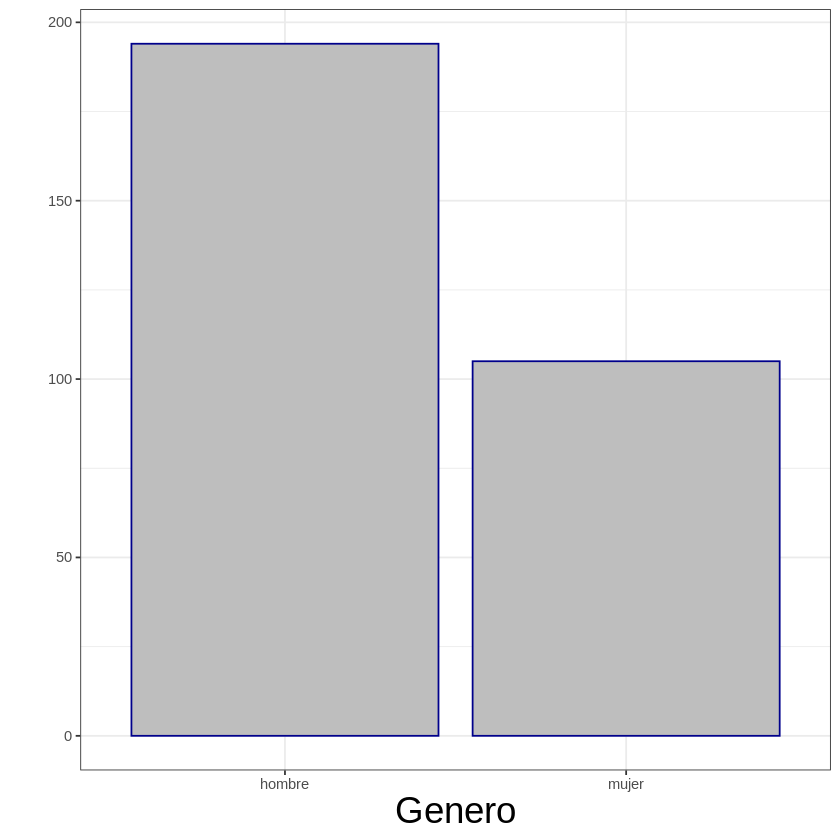

In [ ]:
df%>%
   count(genero)%>%
   ggplot(., aes(genero,n))+
   geom_col(color = "darkblue", fill = "gray")+
   theme_bw()+
   labs(x="Genero", y="")+
   theme(axis.title = "element_text"(size = 22),
      legend.title = element_text(size = 18), 
      legend.text = element_text(size = 18))

Relación de edad y fracción de eyección en población de hipertensos

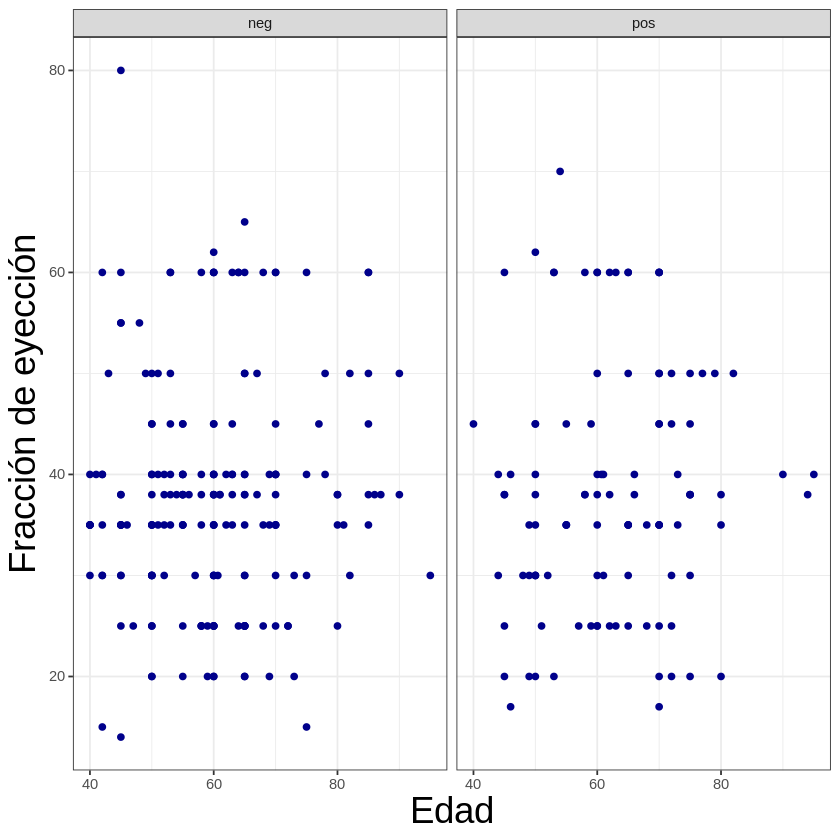

In [ ]:
df%>%
   ggplot(., aes(age, ejection_fraction)) +
   geom_point(colour="darkblue") + 
   facet_wrap(~alta_presion)+
   labs(x="Edad", y="Fracción de eyección")+
   theme_bw()+
   theme(axis.title = element_text(size = 22),
      legend.title = element_text(size = 18), 
      legend.text = element_text(size = 18))

Gráfico de cajas con la relación de plaquetas entre la población de fumadores y no fumadores

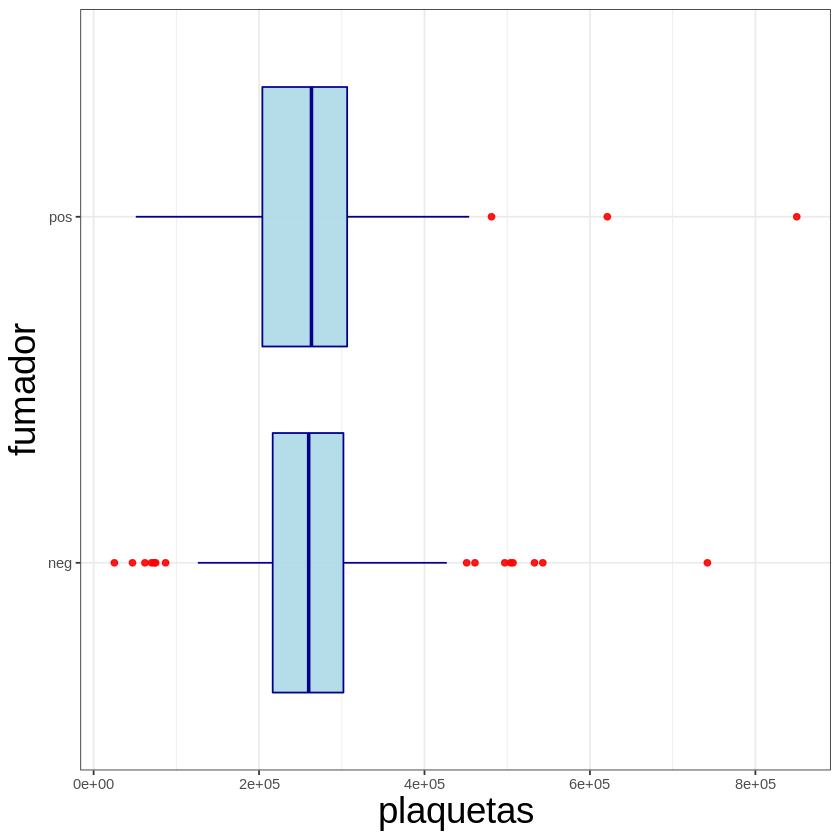

In [ ]:
df%>%
   ggplot(.,aes(platelets,fumador),) + 
   geom_boxplot(color = "darkblue",
                fill = "lightblue", alpha = 0.9, outlier.colour = "red")+
   theme_bw()+
   labs(x="plaquetas", y="fumador")+
   theme(axis.title = element_text(size = 22),
      legend.title = element_text(size = 18), 
      legend.text = element_text(size = 18))

Gráfico con la relación de muertes entre población con diabetes y por rango de edad

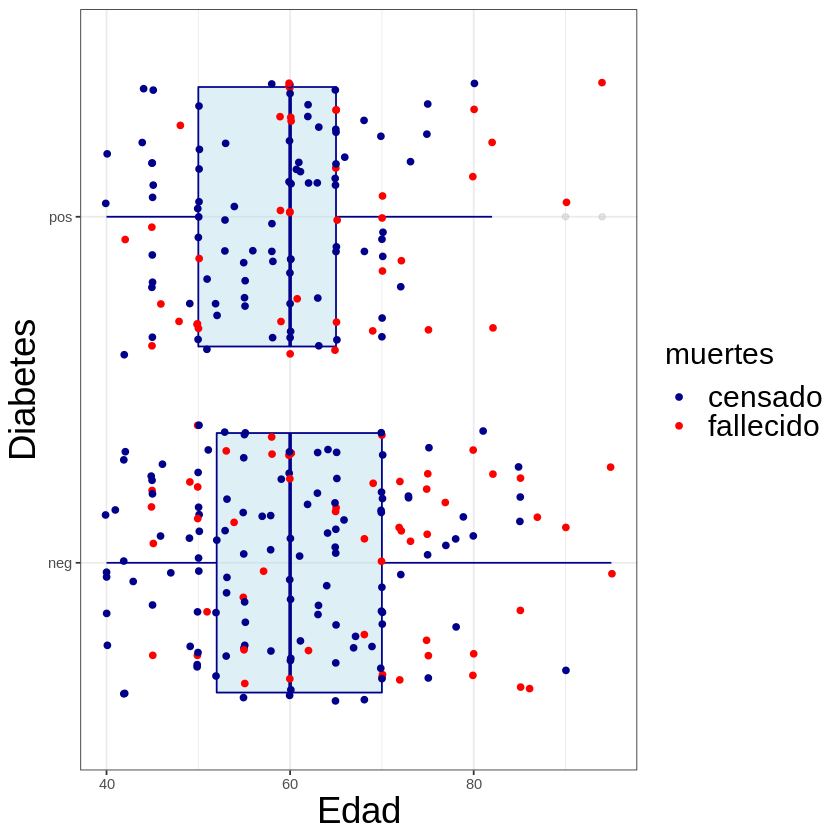

In [ ]:
df%>%
   ggplot(., aes(diabetes, age))+
   geom_boxplot(color = "darkblue",
                fill = "lightblue", alpha = 0.4, outlier.colour = "gray")+
   geom_jitter(aes(color = muertes))+
   scale_color_manual(values = c("darkblue", "red"))+
   coord_flip()+
   theme_bw()+
   labs(x="Diabetes", y="Edad")+
   theme(axis.title = element_text(size = 22),
      legend.title = element_text(size = 18), 
      legend.text = element_text(size = 18))

Referencias

https://www.kaggle.com/marto24/hearth-failure-prediction

https://www.kaggle.com/maevepeng/cox-regression-analysis

https://www.kaggle.com/snowpea8/heart-failure-eda-prediction-with-r-91-5-acc